# Tutorial for water flux partitoning based on `Flux Variance Similarity Theory` (FVS) in Wetland settings
## References: 

1. Wagle, P., Raghav, P., Kumar, M., & Gunter, S. A. (2023). Influence of water use efficiency parameterizations on flux variance similarity-based partitioning of evapotranspiration. Agricultural and Forest Meteorology, 328, 109254. https://doi.org/10.1016/j.agrformet.2022.109254

2. Scanlon, T. M., Schmidt, D. F., & Skaggs, T. H. (2019). Correlation-based flux partitioning of water vapor and carbon dioxide fluxes: Method simplification and estimation of canopy water use efficiency. Agricultural and Forest Meteorology, 279, 107732. https://doi.org/10.1016/j.agrformet.2019.107732

3. Skaggs, T., Anderson, R., Alfieri, J., Scanlon, T. and Kustas, W., 2018. Fluxpart: Open source software for partitioning carbon dioxide and water vapor fluxes. Agricultural and Forest Meteorology, 253: 218-224. https://doi.org/10.1016/j.agrformet.2018.02.019

4. Scanlon, T. M., & Sahu, P. (2008). On the correlation structure of water vapor and carbon dioxide in the atmospheric surface layer: A basis for flux partitioning. Water Resources Research, 44(10). https://doi.org/10.1029/2008WR006932


<span style="display: inline-block; border: 1px solid #FF1111; padding: 2px; background-color: #FFFFFF; color: #FF1111;">
  Contributors: <br>
  <a href="https://praghav444.github.io/">Pushpendra Raghav</a>, The University of Alabama<br>
  <a href="https://www.utoledo.edu/nsm/envsciences/faculty/">Angela Che Ing Tang</a>, The University of Toledo<br>
  <a href="https://inkef.wordpress.com/">Inke Forbrich</a>, The University of Toledo
</span>



Email: ppushpendra@ua.edu 

## Background

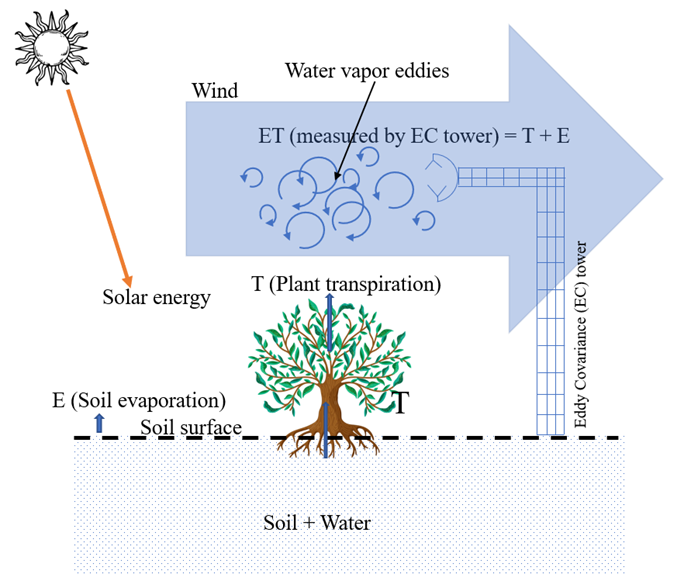


![](CO2_H2O_annimation.gif)


The FVS method can simultaneously partition evapotranspiration (ET) and net ecosystem CO2 exchange (NEE) into their primary components, that is, T and E for ET, and photosynthesis (P) and respiration (R) for NEE, based on the correlation between high-frequency EC measurements of carbon dioxide and water vapor fluxes along with measured or estimated leaf-scale water use efficiency (WUE). 

The derivation of the **FVS** method begins by decomposing the high-frequency time series of carbon dioxide and water vapor into two distinct components:

- **Stomatal components** ($c_p$ and $q_t$), which are associated with **photosynthesis** and **transpiration**.  
- **Non-stomatal components** ($c_r$ and $q_e$), which correspond to **respiration** and **evaporation**.


**Final Equations for the flux components:**


$$
\frac{E}{T} = -\rho_{c_p, c_r}^2 + \rho_{c_p, c_r}^2 
\sqrt{ 1 - \rho_{c_p, c_r}^{-2} 
\left( 1 - \frac{{\color{red}{WUE}}^2 \, \sigma_q^2}{\sigma_{c_p}^2} \right) } 
\tag{1}
$$

$$
\rho_{c_p, c_r}^2 =
\frac{
(1 - \rho_{c,q}^2) \, \sigma_q^2 \sigma_c^2 
\left( \overline{w'c'} - \overline{w'q'} \, {\color{red}{WUE}} \right)^2
}{
\left(
\sigma_q^2 \, \overline{w'c'}^2
- 2 \rho_{c,q} \sigma_q \sigma_c \, \overline{w'q'} \, \overline{w'c'}
+ \sigma_c^2 \, \overline{w'q'}^2
\right)
\left(
\sigma_c^2 - 2 \rho_{c,q} \sigma_q \sigma_c
\right)
}
\tag{2}
$$


$$
\sigma_{c_p}^2 =
\frac{
(1 - \rho_{c,q}^2) \, (\sigma_q \sigma_c {\color{red}{WUE}})^2
\left( 
\sigma_q^2 \, \overline{w'c'}^2
- 2 \rho_{c,q} \sigma_q \sigma_c \, \overline{w'q'} \, \overline{w'c'}
+ \sigma_c^2 \, \overline{w'q'}^2
\right)
}{
\left[
\sigma_c^2 \, \overline{w'q'} + \sigma_q^2 \, \overline{w'c'} {\color{red}{WUE}}
- \rho_{c,q} \sigma_q \sigma_c 
\left( \overline{w'c'} + \overline{w'q'} {\color{red}{WUE}} \right)
\right]^2
}
\tag{3}
$$


**Leaf-level Water Use Efficiency (WUE)** can be estimated as:

$$
\text{WUE} = \frac{F_{c_p}}{F_{q_t}} 
= \frac{ g_c \, (c_i - c_a) }{ g_w \, ( q^{*}(T_L) - q_a ) }
= \frac{ 0.65 \, (c_i - c_a) }{ q^{*}(T_L) - q_a }
\tag{5}
$$

The quantities c$_a$ and q$_a$ can be estimated from **above-canopy tower measurements** by extrapolating a logarithmic mean profile with stability corrections to the zero-plane displacement height.

The intercellular CO$_2$ concentration (c$_i$) can be estimated using one of the following models:

---

### 1. Constant ppm model

$$
c_i = f\big(c_{i,\text{ppm}},\, T_a,\, P\big)
$$

where

$$
c_{i,\text{ppm}} =
\begin{cases}
280~\text{ppm}, & \text{for C$_3$ vegetation}, \\[4pt]
130~\text{ppm}, & \text{for C$_4$ vegetation}.
\end{cases}
$$

---

### 2. Constant ratio model

$$
\frac{c_i}{c_a} = K,
\qquad
K =
\begin{cases}
0.70, & \text{C3} \\
0.44, & \text{C4}
\end{cases}
$$

---

### 3. Linear model

$$
\frac{c_i}{c_a} = a - b\cdot \mathrm{VPD},
\qquad a \approx 1,
\quad b =
\begin{cases}
1.6\times 10^{-4}\ \text{Pa}^{-1}, & \text{C3} \\
2.7\times 10^{-4}\ \text{Pa}^{-1}, & \text{C4}
\end{cases}
$$

---

### 4. Square-root model

$$
\frac{c_i}{c_a} = 1 - \sqrt{\frac{1.6\,\lambda\,\mathrm{VPD}}{c_a}},
\qquad
\lambda = 22\times10^{-9}\ \mathrm{kg\ CO_2\ m^{-3}\ Pa^{-1}}\ (\text{for C3 crops})
$$

---

### 5. Optimum Model

$$
\mathrm{WUE}_{\mathrm{opt}} = 
\frac{
DR \cdot \mathrm{VPD} \cdot m
- \sqrt{DR \cdot \mathrm{VPD} \cdot m \cdot \big(c_a + DR \cdot \mathrm{VPD} \cdot m\big)}
}{
DR \cdot \mathrm{VPD}
}
$$

with

$$
m =
\frac{
 -\big(\sigma_c^2 F_q - \rho_{c,q}\,\sigma_q\,\sigma_c\,F_c\big)
}{
 \sigma_q^2 F_c - \rho_{c,q}\,\sigma_q\,\sigma_c\,F_q
}.
$$

- DR: Ratio of the molecular diffusivities for water vapor and CO2 (with a value of 1.6)

---




In [1]:
import numpy as np; import pandas as pd; from glob import glob; import os
import matplotlib.pyplot as plt

## Functions to process high-frequency data

In [2]:
def WPL_LI7500(P, ea, tair, T, Q, C):
    """
    Apply the WPL correction for water vapor and carbon dioxide concentrations.
    
    Parameters:
    P: Air pressure (Pa)
    ea: Water vapor pressure (Pa)
    tair: Air temperature (C)
    T: Sonic temperature (C)
    Q: Water vapor density from open-path (mmol m-3)
    C: Carbon dioxide concentration from open-path (mmol m-3)

    Returns:
    Q_WPL: Corrected water vapor density
    C_WPL: Corrected carbon dioxide concentration
    Tr: Corrected air temperature (C)
    """
    R = 8.314  # Universal gas constant [J/K/mol]
    m_q = 18.015  # Molecular mass of water vapor, g/mol
    m_a = 28.966  # Molecular mass of dry air, g/mol
    mu = m_a / m_q  # Ratio of molecular masses

    # Convert temperatures to Kelvin
    tair_K = tair + 273.16
    TK = T + 273.16

    # Air molar density [mol/m^3]
    rho = P / (R * tair_K)

    # Water vapor density [mol/m^3]
    rhov = ea / (R * tair_K)

    # Dry air molar density [mol/m^3]
    rhoa = rho - rhov

    # Water vapor mixing ratio (corrected with measured RH)
    xv = R * Q * TK / (1000 * P)
    xv_corr = xv - np.nanmean(xv) + ea / P

    # Real temperature [C] correction based on Kaiamal and Gaynor (1990) eq.3
    Tr = TK / (1 + 0.32 * xv_corr) - 273.16

    # Detto and Katul BLM, 2007 correction
    si = rhov / rhoa
    tn = Tr - np.nanmean(Tr)
    qn = (Q - np.nanmean(Q)) * 1e-3

    A = mu * qn / rhoa + (1 + mu * si) * tn / tair_K
    Q_WPL = Q + np.nanmean(Q) * A
    C_WPL = C + np.nanmean(C) * A

    return Q_WPL, C_WPL, Tr

#-------------------------------------------------------------------------------------------
def tilt_correction(u, v, w, method='PF', Err=1):
    """
    Tilt correction for wind velocity components using the Planar Fit method (PF).
    
    Parameters:
    u: np.ndarray - First wind component (horizontal)
    v: np.ndarray - Second wind component (horizontal)
    w: np.ndarray - Vertical wind component
    method: str - Correction method ('PF' for Planar Fit)
    Err: int - Error handling (0 or 1)
    
    Returns:
    U1, V1, W1: np.ndarray - Corrected wind components
    coeffs: tuple (optional) - Coefficients of planar fit (b0, b1, b2)
    
    [1] Wilczak, J. M., Oncley, S. P., & Stage, S. A. (2001).
    Sonic anemometer tilt correction algorithms.
    Boundary-Layer Meteorology, 99(1), 127-150.
    """
    
    # If no vertical wind component (w), handle horizontal correction only
    if w is None or w.size == 0:
        U1, V1 = np.zeros_like(u), np.zeros_like(v)
        for i in range(len(u)):
            A0 = np.array([u[i], v[i]])
            R = np.arctan2(np.mean(A0[0]), np.mean(A0[1]))
            R1 = np.array([[np.cos(R), -np.sin(R)], [np.sin(R), np.cos(R)]])
            A1 = np.dot(R1, A0)
            U1[i], V1[i] = A1[1], A1[0]
        return U1, V1, None
    
    # For PF (Planar Fit) method
    if method == 'PF':
        meanU, meanV, meanW = np.nanmean(u, axis=1), np.nanmean(v, axis=1), np.nanmean(w, axis=1)
        
        # Remove NaN values
        mask = np.isfinite(meanU) & np.isfinite(meanV) & np.isfinite(meanW)
        meanU, meanV, meanW = meanU[mask], meanV[mask], meanW[mask]
        
        U1, V1, W1 = np.zeros_like(u), np.zeros_like(v), np.zeros_like(w)
        
        # Find the b0, b1, b2 coefficients
        b0, b1, b2 = findB(meanU, meanV, meanW)
        
        # Error check for 'Err' parameter
        if Err == 0:
            b0 = 0
        elif Err != 1:
            raise ValueError("'Err' should be 0 or 1")
        
        Deno = np.sqrt(1 + b1**2 + b2**2)
        p31, p32, p33 = -b1 / Deno, -b2 / Deno, 1 / Deno
        
        cosGamma = p33 / np.sqrt(p32**2 + p33**2)
        sinGamma = -p32 / np.sqrt(p32**2 + p33**2)
        cosBeta = np.sqrt(p32**2 + p33**2)
        sinBeta = p31
        
        R2 = np.array([[1, 0, 0], [0, cosGamma, -sinGamma], [0, sinGamma, cosGamma]])
        R3 = np.array([[cosBeta, 0, sinBeta], [0, 1, 0], [-sinBeta, 0, cosBeta]])
        
        A0 = np.dot(np.dot(R3.T, R2.T), np.array([meanU, meanV, meanW]))
        Alpha = np.arctan2(A0[1], A0[0])
        
        for i in range(len(meanU)):
            R1 = np.array([[np.cos(Alpha[i]), -np.sin(Alpha[i]), 0], [np.sin(Alpha[i]), np.cos(Alpha[i]), 0], [0, 0, 1]])
            A1 = np.dot(R1.T, np.dot(R3.T, np.dot(R2.T, np.array([u[i], v[i], w[i] - b0]))))
            U1[i], V1[i], W1[i] = A1[0], A1[1], A1[2]
        
        return U1, V1, W1
    
    if method == 'rot2':
        U1, V1, W1 = np.zeros_like(u), np.zeros_like(v), np.zeros_like(w)
        M = len(u)
        for ii in range(M):
            # First rotation (around z axis)
            A01 = np.array([u[ii], v[ii]])
            R1 = np.arctan2(np.nanmean(A01[1]), np.nanmean(A01[0]))
            R1_matrix = np.array([[np.cos(R1), np.sin(R1)], [-np.sin(R1), np.cos(R1)]])
            A1 = np.dot(R1_matrix, A01)
            u1 = A1[0]
            V1[ii] = A1[1]

            # Second rotation (around y axis)
            A02 = np.array([u1, w[ii]])
            R2 = np.arctan2(np.nanmean(A02[1]), np.nanmean(A02[0]))
            RotY = np.array([[np.cos(R2), np.sin(R2)], [-np.sin(R2), np.cos(R2)]])
            A2 = np.dot(RotY, A02)
            U1[ii] = A2[0]
            W1[ii] = A2[1]
        return U1, V1, W1
    
    if method == 'rot3':
        M = len(u)
        U1, V1, W1 = np.zeros_like(u), np.zeros_like(v), np.zeros_like(w)
        for ii in range(M):
            # First rotation (around z axis)
            A01 = np.array([u[ii], v[ii]])
            R1 = np.arctan2(np.nanmean(A01[1]), np.nanmean(A01[0]))
            R1_matrix = np.array([[np.cos(R1), np.sin(R1)], [-np.sin(R1), np.cos(R1)]])
            A1 = np.dot(R1_matrix, A01)
            u1 = A1[0]
            v1 = A1[1]

            # Second rotation (around y axis)
            A02 = np.array([u1, w[ii]])
            R2 = np.arctan2(np.nanmean(A02[1]), np.nanmean(A02[0]))
            RotY = np.array([[np.cos(R2), np.sin(R2)], [-np.sin(R2), np.cos(R2)]])
            A2 = np.dot(RotY, A02)
            U1[ii, :] = A2[0]
            w1 = A2[1]

            # Third rotation (around x axis)
            A03 = np.array([v1, w1])
            covVW = np.nanmean(v1 * w1)
            diffVW = np.var(v1) - np.var(w1)
            R3 = 0.5 * np.arctan2(2 * covVW, diffVW)
            RotX = np.array([[np.cos(R3), np.sin(R3)], [-np.sin(R3), np.cos(R3)]])
            A3 = np.dot(RotX, A03)
            V1[ii, :] = A3[0]
            W1[ii, :] = A3[1]
        return U1, V1, W1    
    else:
        raise ValueError("Invalid method. Must be 'PF' or 'rot2' or 'rot3'.")

def findB(meanU, meanV, meanW):
    """ Helper function to find the b0, b1, b2 coefficients for Planar Fit method """
    M = len(meanU)
    su, sv, sw = np.sum(meanU), np.sum(meanV), np.sum(meanW)
    suv = np.dot(meanU, meanV)
    suw = np.dot(meanU, meanW)
    svw = np.dot(meanV, meanW)
    su2 = np.dot(meanU, meanU)
    sv2 = np.dot(meanV, meanV)
    
    H = np.array([[M, su, sv], [su, su2, suv], [sv, suv, sv2]])
    g = np.array([sw, suw, svw])
    x = np.linalg.solve(H, g)
    
    return x[0], x[1], x[2]

NP_TYPE = {
    "IEEE4": np.float32,
    "IEEE8": np.float64,
    "LONG": np.int32,
    "ULONG": np.uint32,
}
#-------------------------------------------------------------------------------------------
def ndarray_read_tob1(tobfile, count=-1):
    """Read TOB1 data file into structured numpy array."""
    with open(tobfile, "rb") as f:
        f.readline()
        names = f.readline().decode().strip().replace('"', "").split(",")
        f.readline()
        f.readline()
        types = f.readline().decode().strip().replace('"', "").split(",")
        dtype = np.dtype([(n, NP_TYPE[t]) for n, t in zip(names, types)])
        return pd.DataFrame(np.fromfile(f, dtype=dtype, count=count))
#-------------------------------------------------------------------------------------------

## Let's visualize the data

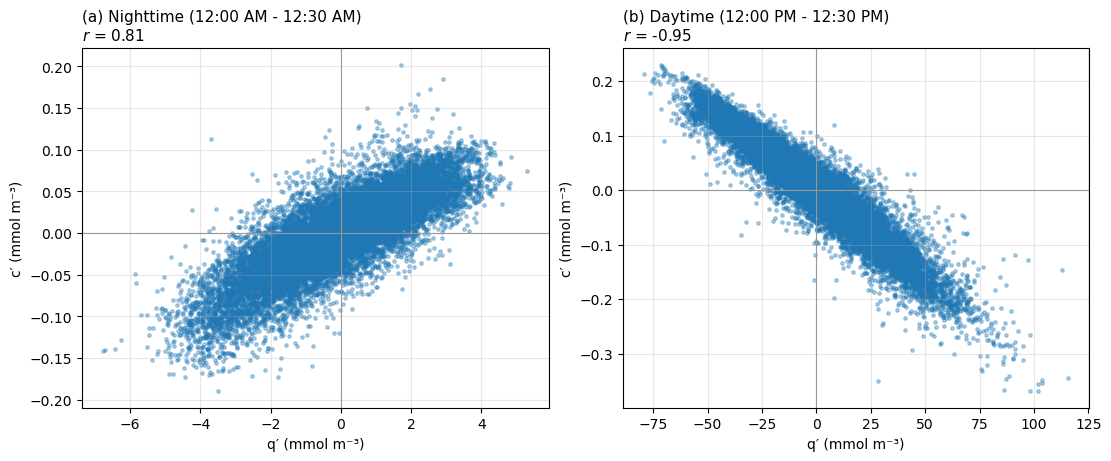

In [3]:
import matplotlib.pyplot as plt
input_dir = "../Input Files/C3_10Hz_august2024/"
q_units = "ppt_dry"   # mmolH2O mol-1 
c_units = "ppm_dry"   # umolCO2 mol-1 
night_idx, day_idx = 0, 24   
rolling_window = 4001     
def load_and_preprocess(tobfile):
    """Read TOB1 file (ndarray_read_tob1 must be available) and return H2O_prime, CO2_prime."""
    # read file and build Datetime as in your working snippet
    df = ndarray_read_tob1(tobfile, count=-1)
    df["Datetime"] = pd.to_datetime(
        arg=df.loc[:, "SECONDS"] + 10**-9 * df.loc[:, "NANOSECONDS"],
        unit="s", origin="1990-01-01",
    )
    key_vars = ['Datetime', 'H2O', 'CO2', 'PA', 'TA_1_1_1', 'T_SONIC', 'Ux', 'Uy', 'Uz']
    df = df[key_vars]

    # your conversion code (preserved exactly)
    coef = 1e3 if q_units[:3] == "ppt" else 1e6
    c = df['CO2'].values
    q = df['H2O'].values
    p = df['PA'].values * 1e3
    t = df['TA_1_1_1'].values + 273.15

    q_mole_ratio = q / coef
    q = q_mole_ratio * p / (8.3144598 / 0.018016) / t

    coef = 1e3 if c_units[:3] == "ppt" else 1e6
    c_mole_ratio = c / coef
    c = c_mole_ratio * p / (8.3144598 / 0.044010) / t
    c /= 1 + c_mole_ratio
    q /= 1 + q_mole_ratio

    CO2_raw = c * 1e3 * 1e3 / 44.01   # CO2 conc., mmol m-3
    H2O_raw = q * 1e3 * 1e3 / 18.016  # H2O conc., mmol m-3

    # filter unrealistic values as you did
    CO2_raw[(CO2_raw > 100) | (CO2_raw < 0)] = np.nan
    H2O_raw[(H2O_raw > 2000) | (H2O_raw < 0)] = np.nan

    # compute primes with centered rolling mean
    H2O_prime = (pd.Series(H2O_raw) - pd.Series(H2O_raw).rolling(window=rolling_window,
                                                                   min_periods=1, center=True).mean()).to_numpy()
    CO2_prime = (pd.Series(CO2_raw) - pd.Series(CO2_raw).rolling(window=rolling_window,
                                                                   min_periods=1, center=True).mean()).to_numpy()
    return H2O_prime, CO2_prime, df['Datetime']

# --- load files -------------------------------------------------------------
tob_files = sorted(glob(os.path.join(input_dir, "*.dat")))
if len(tob_files) == 0:
    raise FileNotFoundError(f"No .dat files found in {input_dir!r}")

# guard indices
for idx in (night_idx, day_idx):
    if idx < 0 or idx >= len(tob_files):
        raise IndexError(f"Requested file index {idx} out of range (0..{len(tob_files)-1})")

night_file = tob_files[night_idx]
day_file   = tob_files[day_idx]

H2O_p_n, CO2_p_n, dt_n = load_and_preprocess(night_file)
H2O_p_d, CO2_p_d, dt_d = load_and_preprocess(day_file)

valid_n = (~np.isnan(H2O_p_n)) & (~np.isnan(CO2_p_n))
valid_d = (~np.isnan(H2O_p_d)) & (~np.isnan(CO2_p_d))
# --- plotting ---------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5), constrained_layout=True)

def do_scatter(ax, H2O_p, CO2_p, valid_mask, title, label):
    H2O_plot = H2O_p[valid_mask]
    CO2_plot = CO2_p[valid_mask]
    r = np.corrcoef(H2O_plot, CO2_plot)[0, 1] if len(H2O_plot) > 1 else np.nan

    ax.scatter(H2O_plot, CO2_plot, s=6, alpha=0.35)
    ax.set_title(f"({label}) {title}\n$r$ = {r:.2f}", loc='left', fontsize=11)
    ax.set_xlabel("q′ (mmol m⁻³)", fontsize=10)
    ax.set_ylabel("c′ (mmol m⁻³)", fontsize=10)
    ax.axhline(0, color='0.6', lw=0.8)
    ax.axvline(0, color='0.6', lw=0.8)
    ax.grid(True, alpha=0.3)

do_scatter(axes[0], H2O_p_n, CO2_p_n, valid_n,
           "Nighttime (12:00 AM - 12:30 AM)", "a")
do_scatter(axes[1], H2O_p_d, CO2_p_d, valid_d,
           "Daytime (12:00 PM - 12:30 PM)", "b")
plt.show()

TOB1_19523.Time_Series_2024_08_01_1200.dat


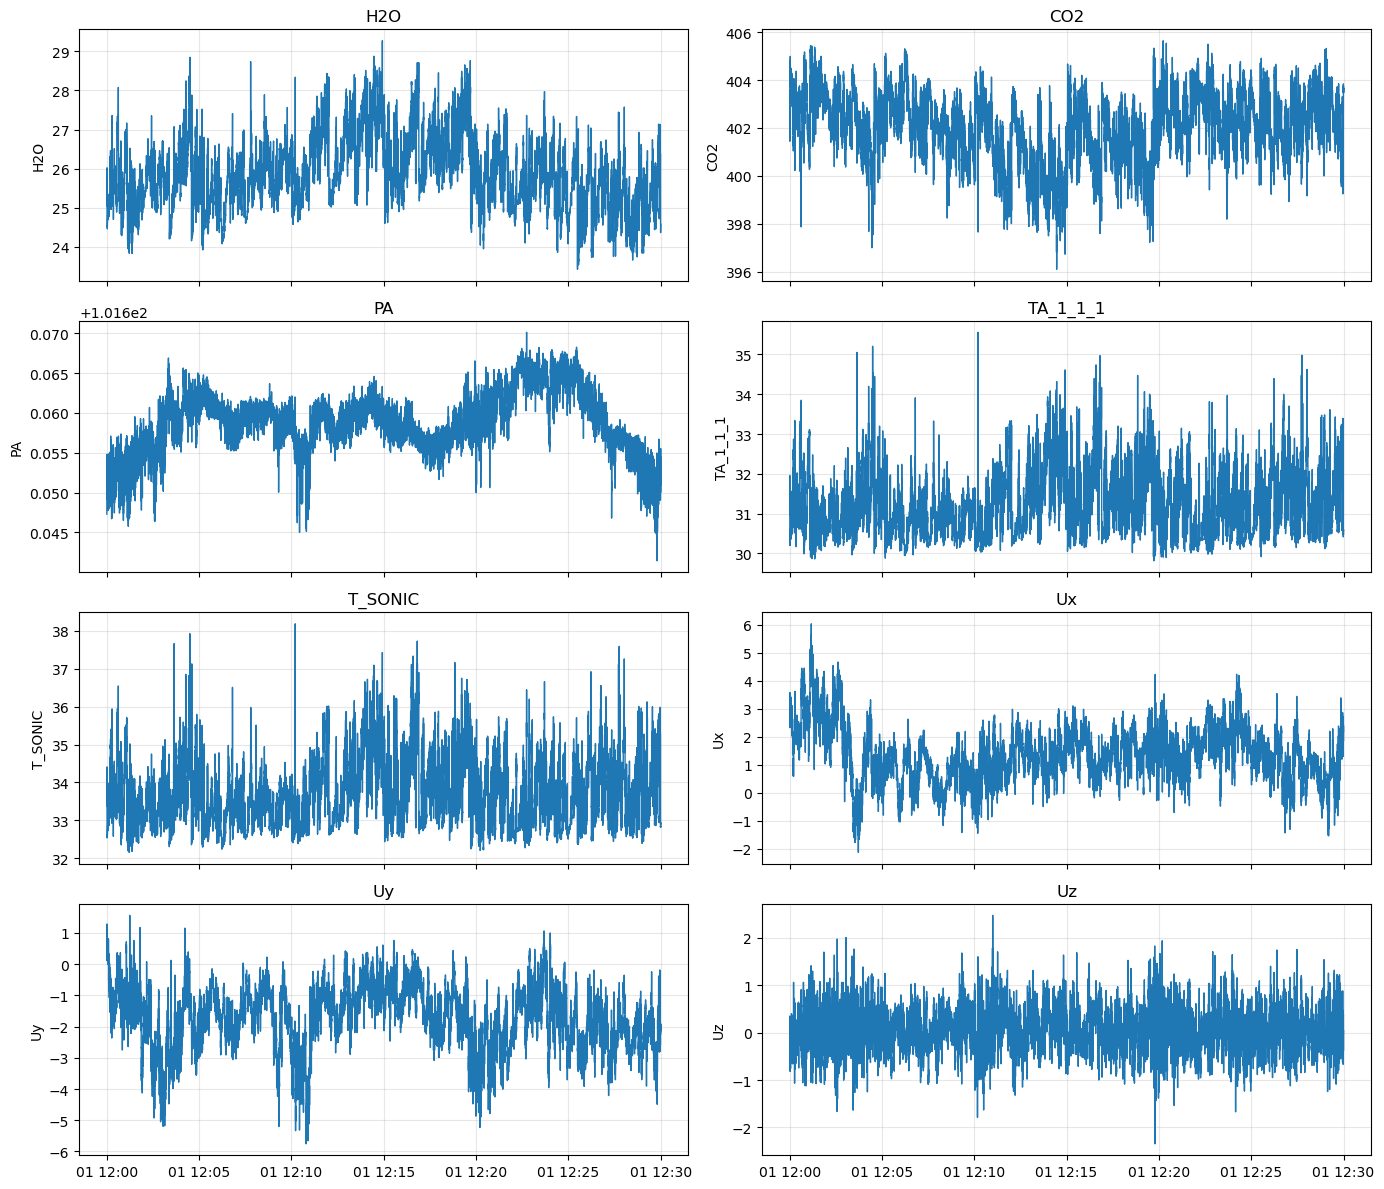

In [4]:
# Let's Plot
q_units = "ppt_dry" # mmolH2O mol-1 
c_units = "ppm_dry" # umolCO2 mol-1 
input_dat_dir = "../Input Files/C3_10Hz_august2024/" 
tob1_files = glob("../Input Files/C3_10Hz_august2024/*.dat") 
tobfile = tob1_files[24] # file 0: Mid-night (12:00AM-12:30AM); file 24: Mid-day (12:00PM-12:30PM) 
filename = os.path.basename(tobfile) 
# Extracting date and time from filename 
year = filename.split('.')[1].split('_')[2] 
month = filename.split('.')[1].split('_')[3] 
day = filename.split('.')[1].split('_')[4] 
hour_minute = filename.split('.')[1].split('_')[5] 
hour = hour_minute[:2] 
minute = int(hour_minute[2:]) 
# Account for partial files 
if 0 < minute < 30: 
    minute = 0 
elif 30 <= minute < 60: 
    minute = 30 
DateTime = f"{year}-{month}-{day} {hour}:{minute:02d}:00" 
print(filename) 
# Reading the file and creating dataframe 
df = ndarray_read_tob1(tobfile, count=-1) 
df["Datetime"] = pd.to_datetime( arg=df.loc[:, "SECONDS"] + 10**-9 * df.loc[:, "NANOSECONDS"], unit="s", origin="1990-01-01", )
key_vars = ['Datetime', 'H2O', 'CO2', 'PA', 'TA_1_1_1', 'T_SONIC', 'Ux', 'Uy', 'Uz']
df = df[key_vars]

fig, axes = plt.subplots(4, 2, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for i, var in enumerate(key_vars[1:]): 
    ax = axes[i]
    ax.plot(df['Datetime'], df[var], lw=1)
    ax.set_title(var, fontsize=12)
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

if len(key_vars[1:]) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## Let's calculate mean statistics of high frequency measurements of carbon and water fluxes

In [6]:
q_units = "ppt_dry"  # mmolH2O mol-1
c_units = "ppm_dry"  # umolCO2 mol-1
input_dat_dir = "../Input Files/C3_10Hz_august2024/"
tob1_files = glob("../Input Files/C3_10Hz_august2024/*.dat")
tob1_files = tob1_files[0:48]
df_final = []
for tobfile in tob1_files:
    filename = os.path.basename(tobfile)
    # Extracting date and time from filename
    year = filename.split('.')[1].split('_')[2]
    month = filename.split('.')[1].split('_')[3]
    day = filename.split('.')[1].split('_')[4]
    hour_minute = filename.split('.')[1].split('_')[5]
    hour = hour_minute[:2]
    minute = int(hour_minute[2:])
    
    # Account for partial files
    if 0 < minute < 30:
        minute = 0
    elif 30 <= minute < 60:
        minute = 30
    
    DateTime = f"{year}-{month}-{day} {hour}:{minute:02d}:00"
    print(filename)
    # Reading the file and creating dataframe
    df = ndarray_read_tob1(tobfile, count=-1)
    df["Datetime"] = pd.to_datetime(
        arg=df.loc[:, "SECONDS"] + 10**-9 * df.loc[:, "NANOSECONDS"],
        unit="s", origin="1990-01-01",
    )
    
    # Process the columns and apply units
    coef = 1e3 if q_units[:3] == "ppt" else 1e6
    q = df['H2O'].values
    c = df['CO2'].values
    p = df['PA'].values * 1e3
    t = df['TA_1_1_1'].values + 273.15
    
    q_mole_ratio = q / coef
    q = q_mole_ratio * p / (8.3144598 / 0.018016) / t
    
    coef = 1e3 if c_units[:3] == "ppt" else 1e6
    c_mole_ratio = c / coef
    c = c_mole_ratio * p / (8.3144598 / 0.044010) / t
    
    if c_units[-3:] == "dry":
        c /= 1 + c_mole_ratio
    if q_units[-3:] == "dry":
        q /= 1 + q_mole_ratio
    CO2_raw = c*1e3*1e3/44.01   # CO2 conc., mmol m-3
    H2O_raw = q*1e3*1e3/18.016  # H2O conc., mmol m-3
    T_raw = df['TA_1_1_1'].values  # Air temperature, degrees C
    P_raw = df['PA'].values   # Air pressure, kPa
    U_raw = df['Ux'].values   # U velocity component, m s-1
    V_raw = df['Uy'].values   # V velocity component, m s-1
    W_raw = df['Uz'].values   # W velocity component, m s-1
    Tsonic_raw = df['T_SONIC'].values + 273.15  #Sonic temperature, K
    
    CO2_raw[(CO2_raw > 100) | (CO2_raw < 0)] = np.nan
    H2O_raw[(H2O_raw > 2000) | (H2O_raw < 0)] = np.nan
    T_raw[(T_raw > 60) | (T_raw < -50)] = np.nan
    W_raw[(W_raw > 20) | (W_raw < -20)] = np.nan
    Tsonic_raw[(Tsonic_raw > (60 + 273.15)) | (Tsonic_raw < (-50 + 273.15))] = np.nan
    U_raw = U_raw.reshape(-1,1)
    V_raw = V_raw.reshape(-1,1)
    W_raw = W_raw.reshape(-1,1)
    
    # Apply planar fit axis rotation
    U_rot, V_rot, W_rot = tilt_correction(U_raw, V_raw, W_raw, method='PF')
    U_rot = U_rot.reshape(-1)
    V_rot = V_rot.reshape(-1)
    W_rot = W_rot.reshape(-1)
    CO2_mean = np.nanmean(CO2_raw) # Mean CO2 conc., mmol m-3
    H2O_mean = np.nanmean(H2O_raw) # Mean H2O conc., mmol m-3
    T_mean = np.nanmean(T_raw)     # Mean air temperature, degrees C
    P_mean = np.nanmean(P_raw)     # Mean air pressure, kPa
    
    # Apply WPL correction - after Detto and Katul (2007)
    ea = H2O_mean/1000*8.3143*(T_mean+273.15)  # vapor pressure, Pa
    #H2O_WPL,CO2_WPL,Tr = WPL_LI7500(P_mean*1000,ea,T_mean,Tsonic_raw-273.15,H2O_raw,CO2_raw)
    H2O_WPL,CO2_WPL = H2O_raw, CO2_raw
    
    # Calculate perturbations from mean using moving mean
    H2O_prime = (pd.Series(H2O_WPL) - pd.Series(H2O_WPL).rolling(window=4001, min_periods=1, center=True).mean()).to_numpy()
    CO2_prime = (pd.Series(CO2_WPL) - pd.Series(CO2_WPL).rolling(window=4001, min_periods=1, center=True).mean()).to_numpy()
    w_prime = (pd.Series(W_rot) - pd.Series(W_rot).rolling(window=4001, min_periods=1, center=True).mean()).to_numpy()
    
    sdq = np.nanstd(H2O_prime)   # Standard deviation in H2O molar conc., mmol m-3
    sdc = np.nanstd(CO2_prime);   # Standard deviation in CO2 molar conc., mmol m-3
    Fc = np.nanmean(w_prime*CO2_prime) #CO2 flux, mmol m s-1 m-3
    Fq = np.nanmean(w_prime*H2O_prime) #H2O flux, mmol m s-1 m-3
    rho_cq = np.nanmean(CO2_prime*H2O_prime)/np.nanstd(CO2_prime)/np.nanstd(H2O_prime) 
    
    temp = pd.DataFrame({'DateTime':[DateTime], 'CO2_mean':[CO2_mean],'H2O_mean':[H2O_mean],'T_mean':[T_mean],
                        'P_mean':[P_mean],'sdq':[sdq],'sdc':[sdc],'Fc':[Fc],'Fq':[Fq],'rho_cq':[rho_cq]})
    df_final.append(temp)
df_final = pd.concat(df_final, ignore_index=True)

TOB1_19523.Time_Series_2024_08_01_0000.dat
TOB1_19523.Time_Series_2024_08_01_0030.dat
TOB1_19523.Time_Series_2024_08_01_0100.dat
TOB1_19523.Time_Series_2024_08_01_0130.dat
TOB1_19523.Time_Series_2024_08_01_0200.dat
TOB1_19523.Time_Series_2024_08_01_0230.dat
TOB1_19523.Time_Series_2024_08_01_0300.dat
TOB1_19523.Time_Series_2024_08_01_0330.dat
TOB1_19523.Time_Series_2024_08_01_0400.dat
TOB1_19523.Time_Series_2024_08_01_0430.dat
TOB1_19523.Time_Series_2024_08_01_0500.dat
TOB1_19523.Time_Series_2024_08_01_0530.dat
TOB1_19523.Time_Series_2024_08_01_0600.dat
TOB1_19523.Time_Series_2024_08_01_0630.dat
TOB1_19523.Time_Series_2024_08_01_0700.dat
TOB1_19523.Time_Series_2024_08_01_0730.dat
TOB1_19523.Time_Series_2024_08_01_0800.dat
TOB1_19523.Time_Series_2024_08_01_0830.dat
TOB1_19523.Time_Series_2024_08_01_0900.dat
TOB1_19523.Time_Series_2024_08_01_0930.dat
TOB1_19523.Time_Series_2024_08_01_1000.dat
TOB1_19523.Time_Series_2024_08_01_1030.dat
TOB1_19523.Time_Series_2024_08_01_1100.dat
TOB1_19523.

## Finally, we partitiong the fluxes

In [8]:
ts_p20 = np.full((len(df_final), 9), np.nan)
ts_p20[:, 0] = df_final['CO2_mean'].values
ts_p20[:, 1] = df_final['H2O_mean'].values
ts_p20[:, 2] = df_final['T_mean'].values
ts_p20[:, 3] = df_final['P_mean'].values
ts_p20[:, 4] = df_final['sdq'].values
ts_p20[:, 5] = df_final['sdc'].values
ts_p20[:, 6] = df_final['Fc'].values
ts_p20[:, 7] = df_final['Fq'].values
ts_p20[:, 8] = df_final['rho_cq'].values
# Now remove unreasonable outliers from output data
ts_p20[np.where((ts_p20[:, 0] < 12) | (ts_p20[:, 0] > 30)), 0] = np.nan 
ts_p20[np.where((ts_p20[:, 1] < 100) | (ts_p20[:, 1] > 1400)) , 1] = np.nan 
ts_p20[np.where(ts_p20[:, 4] > 100) , 4] = np.nan
ts_p20[np.where(ts_p20[:, 5] > 3), 5] = np.nan
ts_p20[np.where((ts_p20[:, 6] > 0.012) | (ts_p20[:, 6] < -0.03)) , 6] = np.nan
ts_p20[np.where((ts_p20[:, 7] > 10) | (ts_p20[:, 7] < -1)), 7] = np.nan
# Assign variable names to output
CO2_conc = ts_p20[:, 0]  # Mean CO2 conc., mmol m-3
H2O_conc = ts_p20[:, 1]  # Mean H2O conc., mmol m-3
T = ts_p20[:, 2]         # Mean temperature, degrees C
P = ts_p20[:, 3]         # Mean pressure, kPa
SDq = ts_p20[:, 4]       # Standard deviation in H2O molar conc., mmol m-3
SDc = ts_p20[:, 5]       # Standard deviation in CO2 molar conc., mmol m-3
F_c = ts_p20[:, 6]       # CO2 flux, mmol m s-1 m-3
F_q = ts_p20[:, 7]       # H2O flux, mmol m s-1 m-3
cq = ts_p20[:, 8]        # Correlation coefficient between c and q

b = (SDq**2 * F_c**2 - 2 * cq * SDq * SDc * F_c * F_q + SDc**2 * F_q**2) / (SDq**2 * F_c - cq * SDc * SDq * F_q)
m = -(SDc**2 * F_q - cq * SDq * SDc * F_c) / (SDq**2 * F_c - cq * SDq * SDc * F_q)

constr = np.ones_like(b)
constr[np.where(F_c / F_q > cq * SDc / SDq)] = np.nan
constr[np.where((cq > 0) & (F_c / F_q > cq * SDc / SDq))] = np.nan
constr[np.where((cq < 0) & (F_c / F_q >= cq * SDc / SDq))] = np.nan
constr[np.where((cq < 0) & (F_c / F_q <= 1 / (cq * SDc / SDq)))] = np.nan

b_con = b * constr
m_con = m * constr

# Now determine factors that are needed for WUE estimation
R = 8.3143  # Ideal gas constant, J mol-1 K-1
CO2_ppm = (CO2_conc / 1000) * R * (T + 273.15) / 1000 / P * 1e6

# WUE models parameters
param_const_ppm = 130     # `Constant ppm` method parameter
param_const_ratio = 0.44  # `Constant ratio` method parameter
param_a_linear_VPD = 1  # `Linear VPD` method parameter a
param_b_linear_VPD = 2.7e-4   # `Linear VPD` method parameter b
# Values of Ci in mmol m-3 associated with constant ppm
Ci_constCi = param_const_ppm * 1000 / R / (T + 273.15) * 1000 * P / 1e6  

# Values of Ci in mmol m-3 associated with constant Ci/Ca ratios
Ci_constCiCa = param_const_ratio * CO2_conc  

# Vapor Pressure Deficit (VPD) calculation
a = 0.611; b = 17.502; c = 240.97 
VPD = a * np.exp(b * T / (T + c)) - H2O_conc / 1000 * R * (T + 273.15) / 1000  # VPD in kPa
VPD[VPD < 0.01] = 0.01  # Set minimum VPD to 0.01 kPa

# Calculate Ci associated with linear decline in Ci/Ca with respect to VPD
Ci_linear = (param_a_linear_VPD - param_b_linear_VPD * VPD * 1000) * CO2_conc
Ci_linear[Ci_linear < 1] = 1  # Ensure Ci is at least 1

H2O_conci = a * np.exp(b * T / (T + c)) * 1000 / (T + 273.15) / R * 1000  # Internal water vapor concentration in mmol m-3
# Difference in H2O concentration between inside and outside the leaf
D = H2O_conci - H2O_conc  # Difference in H2O concentration, mmol m-3
D[D < 5] = 5  # Avoid negative values
DR = 1.6

# Calculate various forms of WUE
W_constCi = (Ci_constCi - CO2_conc) / D / DR  # WUE for constant Ci 
W_constCi[W_constCi > F_c / F_q] = np.nan


W_constCiCa = (Ci_constCiCa - CO2_conc) / D / DR  # WUE for constant Ci/Ca ratio
W_constCiCa[W_constCiCa > F_c / F_q] = np.nan


W_linear = (Ci_linear - CO2_conc) / D / DR  # WUE for linear dependence of Ci on VPD
W_linear[W_linear > F_c / F_q] = np.nan

W_opt = (DR * D * m_con - (DR * D * m_con * (CO2_conc + DR * D * m_con))**0.5) / (DR * D)  # WUE from optimal formulation
W_opt[W_opt > F_c / F_q] = np.nan

TET_constCi = b_con / (W_constCi - m) / F_q  # T/ET ratio for constant 


TET_constCiCa = b_con / (W_constCiCa - m) / F_q  # T/ET ratio for constant Ci/Ca ratio

TET_linear = b_con / (W_linear - m) / F_q  # T/ET ratio for linear dependence of Ci on VPD

TET_opt = b_con / (W_opt - m) / F_q  # T/ET ratio for optimal formulation

# Add output
df_final['VPD'] = VPD
df_final['Ci_constCi'] = Ci_constCi
df_final['Ci_constCiCa'] = Ci_constCiCa
df_final['Ci_linear'] = Ci_linear

# Calculate Ci associated with optimal method
Ci_opt = W_opt * DR * D + CO2_conc
df_final['Ci_opt'] = Ci_opt  # Add Ci_opt to DataFrame

df_final['W_constCi'] = W_constCi
df_final['W_constCiCa'] = W_constCiCa
df_final['W_linear'] = W_linear
df_final['W_opt'] = W_opt

df_final['TET_constCi'] = TET_constCi
df_final['TET_constCiCa'] = TET_constCiCa
df_final['TET_linear'] = TET_linear
df_final['TET_opt'] = TET_opt

C:\Users\ppushpendra\AppData\Local\Temp\ipykernel_12276\1789416092.py:83: RuntimeWarning: invalid value encountered in sqrt
  W_opt = (DR * D * m_con - (DR * D * m_con * (CO2_conc + DR * D * m_con))**0.5) / (DR * D)  # WUE from optimal formulation


## Let's visualize the partition results

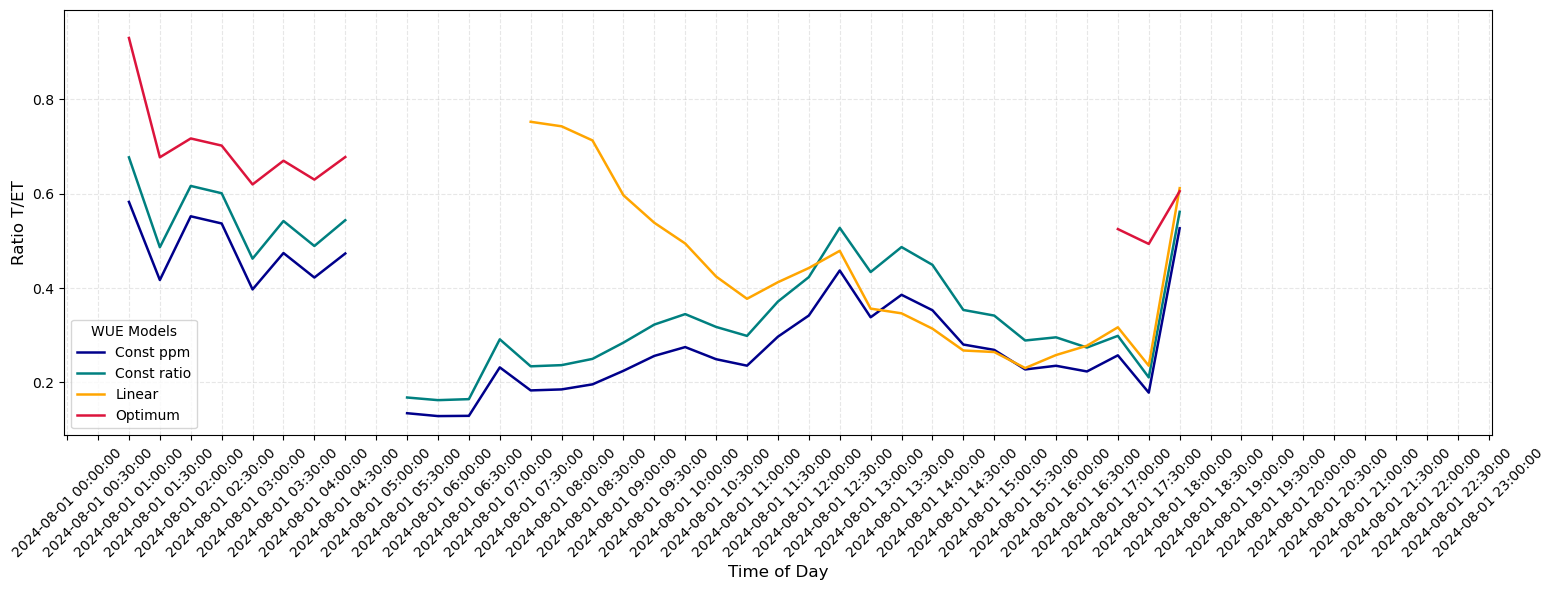

In [9]:
plt.figure(figsize=(16, 5))
plt.plot(df_final['DateTime'], df_final['TET_constCi'], label="Const ppm", color="darkblue", linewidth=1.8)
plt.plot(df_final['DateTime'], df_final['TET_constCiCa'], label="Const ratio", color="teal", linewidth=1.8)
plt.plot(df_final['DateTime'], df_final['TET_linear'], label="Linear", color="orange", linewidth=1.8)
plt.plot(df_final['DateTime'], df_final['TET_opt'], label="Optimum", color="crimson", linewidth=1.8)

plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Ratio T/ET", fontsize=12)

plt.grid(alpha=0.3, linestyle='--')
plt.legend(title="WUE Models", fontsize=10)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()